In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
df=pd.read_csv("black-friday.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.drop(columns=['Product_Category_2', 'Product_Category_3'], inplace=True)

In [4]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Product_ID'] = label_encoder.fit_transform(df['Product_ID'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Age'] = label_encoder.fit_transform(df['Age'])
df['City_Category'] = label_encoder.fit_transform(df['City_Category'])
df['Stay_In_Current_City_Years'] = label_encoder.fit_transform(df['Stay_In_Current_City_Years'])

<Figure size 500x300 with 0 Axes>

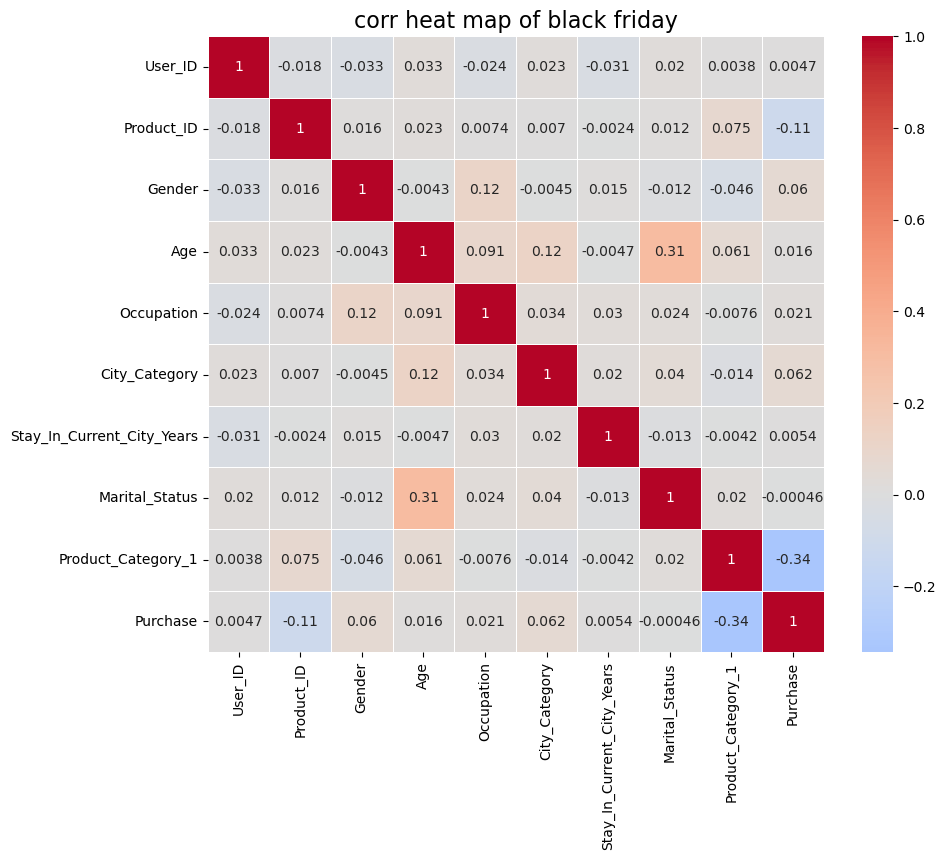

In [6]:
plt.figure(figsize = (5,3))
corr_martrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_martrix,annot=True,cmap='coolwarm',center=0,square=True,linewidth=0.5)
plt.title("corr heat map of black friday",fontsize=16)
plt.show()

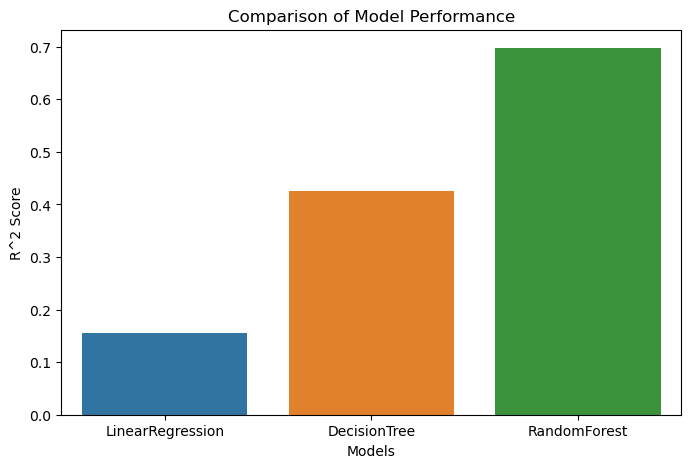

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_csv("black-friday.csv")

# Data Cleaning
df.fillna(-1, inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Age'] = le.fit_transform(df['Age'])
df['City_Category'] = le.fit_transform(df['City_Category'])
df['Stay_In_Current_City_Years'] = le.fit_transform(df['Stay_In_Current_City_Years'])

# Feature Selection
df['Product_ID'] = le.fit_transform(df['Product_ID'])  # Convert Product_ID to numeric
df['User_ID'] = le.fit_transform(df['User_ID'])  # Convert User_ID to numeric

X = df[['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']]

y = df['Purchase']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor()
}

r2_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_scores[name] = r2_score(y_test, y_pred)

# Visualization
plt.figure(figsize=(8,5))
sns.barplot(x=list(r2_scores.keys()), y=list(r2_scores.values()))
plt.xlabel("Models")
plt.ylabel("R^2 Score")
plt.title("Comparison of Model Performance")
plt.show()


In [10]:
r2_scores

{'LinearRegression': 0.15604715520706125,
 'DecisionTree': 0.4264185392830204,
 'RandomForest': 0.6973318535256918}